# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [98]:
%matplotlib inline
# target parameters of f(x) = m*x + b
m = 2  # slope
b = 1  # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [99]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b  # ideal (target) linear function

sigma = 0.0  # noise standard deviation, for the moment it is absent
y_train = np.random.normal(
    m * x_train + b, sigma
)  # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

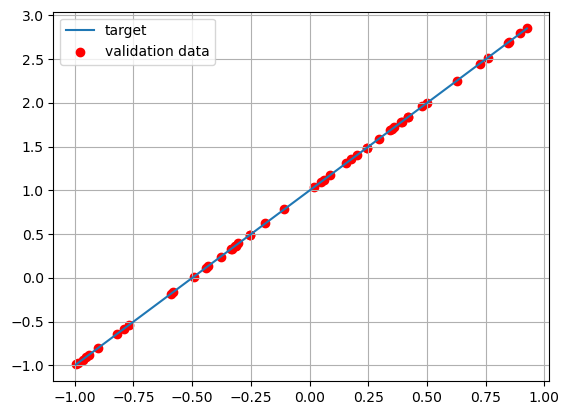

In [100]:
# plot validation and target dataset
import matplotlib.pyplot as plt

plt.plot(x_valid, y_target, label="target")
plt.scatter(x_valid, y_valid, color="r", label="validation data")
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [101]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense
from tensorflow.keras import Input

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer="sgd", loss="mse", metrics=["mse"])

In [102]:
# get a summary of our composed model
model.summary()

Model: "sequential_198"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_702 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [103]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=30,
    shuffle=True,  # a good idea is to shuffle input before at each epoch
    validation_data=(x_valid, y_valid),
)

Epoch 1/30
 1/16 [>.............................] - ETA: 2s - loss: 5.4910 - mse: 5.4910

16/16 [==============================] - 0s 7ms/step - loss: 4.2444 - mse: 4.2444 - val_loss: 3.2276 - val_mse: 3.2276
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 3.2130 - mse: 3.2130 - val_loss: 2.4929 - val_mse: 2.4929
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 2.4835 - mse: 2.4835 - val_loss: 1.9540 - val_mse: 1.9540
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 1.9443 - mse: 1.9443 - val_loss: 1.5455 - val_mse: 1.5455
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 1.5343 - mse: 1.5343 - val_loss: 1.2315 - val_mse: 1.2315
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 1.2188 - mse: 1.2188 - val_loss: 0.9864 - val_mse: 0.9864
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.9736 - mse: 0.9736 - val_loss: 0.7914 - val_mse: 0.7914
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7789 - mse: 0.7789 - val_lo

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [104]:
# return weights and biases
model.get_weights()

[array([[1.8710023]], dtype=float32), array([0.9986362], dtype=float32)]

In [105]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0053 - mse: 0.0053

Test loss: 0.005291623063385487
Test accuracy: 0.005291623063385487


In [106]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0053 - mse: 0.0053

Test loss: 0.005291623063385487
Test accuracy: 0.005291623063385487


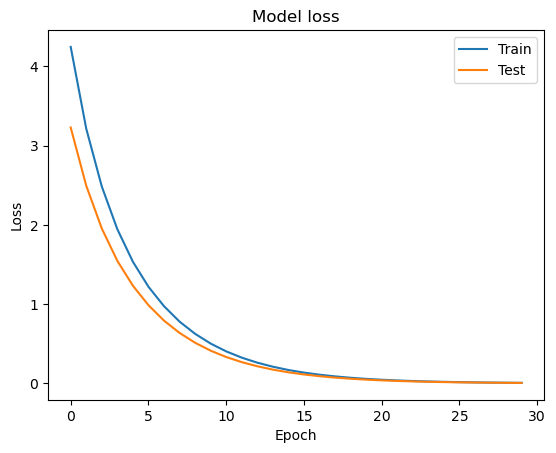

In [107]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="best")
plt.show()

4/4 [==============================] - 0s 754us/step


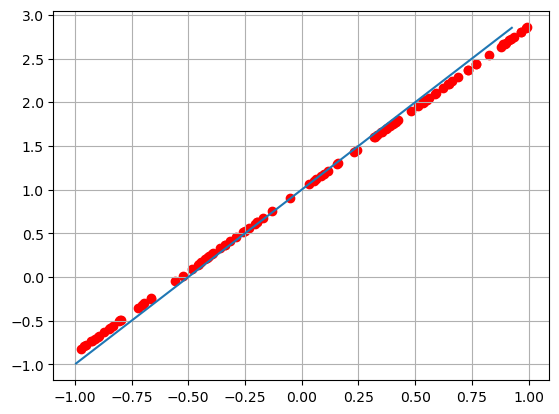

In [108]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color="r")
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [109]:
n_epochs = 50
n_train_data = [50, 100, 1000]
n_validations = [25, 50, 500]
sigmas = [0.0, 0.1, 0.5]


def orig_func(x):
    m = 2
    q = 1
    return m * x + q


def plot_func(
    sigma, n_train_data=n_train_data, n_validations=n_validations, n_epochs=n_epochs
):
    assert len(n_train_data) == len(
        n_validations
    ), "n_train_data and n_validations must have the same length"

    x_plot = np.linspace(-1, 1, 100)
    y_plot = orig_func(x_plot)
    rng = np.random.default_rng()

    fig, axs = plt.subplots(
        len(n_train_data), 2, figsize=(6, 6), layout="constrained", sharex="col"
    )
    for train, valid, ax_row in zip(n_train_data, n_validations, axs):
        x_valid = rng.uniform(-1, 1, valid)
        x_train = rng.uniform(-1, 1, train)
        y_train = rng.normal(orig_func(x_train), sigma)
        y_valid = rng.normal(orig_func(x_valid), sigma)

        ax_row[0].plot(x_plot, y_plot, label="target")
        ax_row[0].plot(x_valid, y_valid, "r.", label="validation data")
        ax_row[0].plot(x_train, y_train, "b.", label="train data")

        model = tf.keras.Sequential()
        model.add(Input(shape=(1,)))
        model.add(Dense(1, input_shape=(1,)))
        model.compile(optimizer="sgd", loss="mse", metrics=["mse"])

        history = model.fit(
            x=x_train,
            y=y_train,
            batch_size=32,
            epochs=n_epochs,
            shuffle=True,  # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid),
        )

        model_weight, bias = model.get_weights()

        ax_row[0].plot(
            x_plot,
            model.predict(x_plot),
            label="predicted\nm = {:.2f}\nq = {:.2f}".format(
                model_weight[0][0], bias[0]
            ),
        )

        ax_row[1].plot(history.history["loss"], label="train loss")
        ax_row[1].plot(history.history["val_loss"], label="validation loss")
        ax_row[1].set_ylabel("Loss")
        ax_row[1].set_xlabel("Epoch")
        ax_row[1].legend()
        
        ax_row[0].set_xlabel("x")
        ax_row[0].set_ylabel("y")
        ax_row[0].set_title(f"Training with {train} data points")
        ax_row[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))

        fig.suptitle(r"Training with $\sigma$ : " + f"{sigma:.2f}")


Epoch 1/50
2/2 [==============================] - 0s 94ms/step - loss: 3.5227 - mse: 3.5227 - val_loss: 3.3589 - val_mse: 3.3589
Epoch 2/50
2/2 [==============================] - 0s 26ms/step - loss: 3.3211 - mse: 3.3211 - val_loss: 3.1807 - val_mse: 3.1807
Epoch 3/50
2/2 [==============================] - 0s 26ms/step - loss: 3.1458 - mse: 3.1458 - val_loss: 3.0183 - val_mse: 3.0183
Epoch 4/50
2/2 [==============================] - 0s 26ms/step - loss: 2.9868 - mse: 2.9868 - val_loss: 2.8712 - val_mse: 2.8712
Epoch 5/50
2/2 [==============================] - 0s 25ms/step - loss: 2.8351 - mse: 2.8351 - val_loss: 2.7211 - val_mse: 2.7211
Epoch 6/50
2/2 [==============================] - 0s 26ms/step - loss: 2.6864 - mse: 2.6864 - val_loss: 2.5828 - val_mse: 2.5828
Epoch 7/50
2/2 [==============================] - 0s 27ms/step - loss: 2.5487 - mse: 2.5487 - val_loss: 2.4474 - val_mse: 2.4474
Epoch 8/50
2/2 [==============================] - 0s 27ms/step - loss: 2.4182 - mse: 2.4182 - val

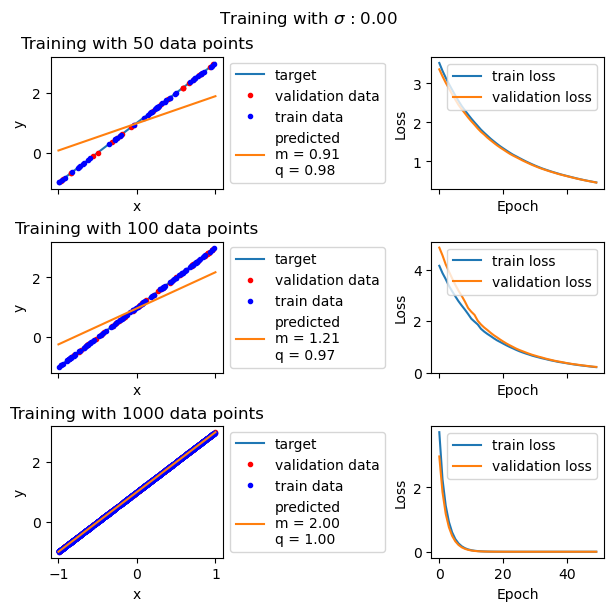

In [110]:
plot_func(sigmas[0])

Epoch 1/50
2/2 [==============================] - 0s 94ms/step - loss: 1.5453 - mse: 1.5453 - val_loss: 1.9694 - val_mse: 1.9694
Epoch 2/50
2/2 [==============================] - 0s 26ms/step - loss: 1.4461 - mse: 1.4461 - val_loss: 1.8555 - val_mse: 1.8555
Epoch 3/50
2/2 [==============================] - 0s 26ms/step - loss: 1.3520 - mse: 1.3520 - val_loss: 1.7442 - val_mse: 1.7442
Epoch 4/50
2/2 [==============================] - 0s 25ms/step - loss: 1.2624 - mse: 1.2624 - val_loss: 1.6438 - val_mse: 1.6438
Epoch 5/50
2/2 [==============================] - 0s 28ms/step - loss: 1.1810 - mse: 1.1810 - val_loss: 1.5476 - val_mse: 1.5476
Epoch 6/50
2/2 [==============================] - 0s 29ms/step - loss: 1.1042 - mse: 1.1042 - val_loss: 1.4602 - val_mse: 1.4602
Epoch 7/50
2/2 [==============================] - 0s 27ms/step - loss: 1.0348 - mse: 1.0348 - val_loss: 1.3810 - val_mse: 1.3810
Epoch 8/50
2/2 [==============================] - 0s 26ms/step - loss: 0.9725 - mse: 0.9725 - val

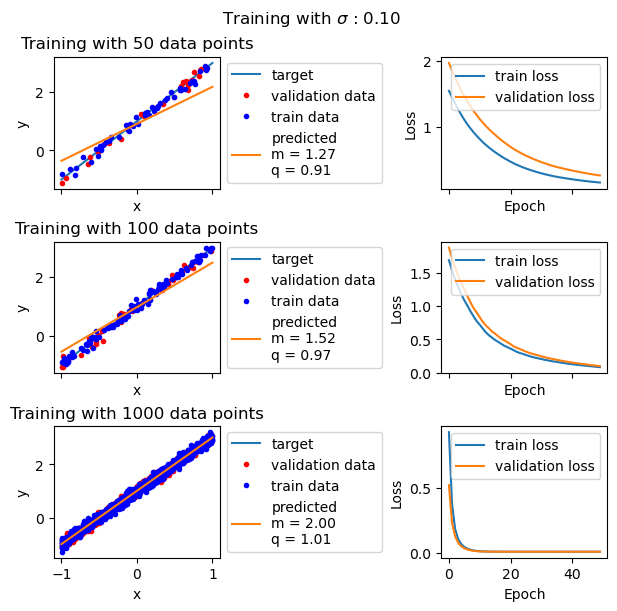

In [111]:
plot_func(sigmas[1])

Epoch 1/50
2/2 [==============================] - 0s 95ms/step - loss: 1.6368 - mse: 1.6368 - val_loss: 1.6393 - val_mse: 1.6393
Epoch 2/50
2/2 [==============================] - 0s 26ms/step - loss: 1.5497 - mse: 1.5497 - val_loss: 1.5474 - val_mse: 1.5474
Epoch 3/50
2/2 [==============================] - 0s 26ms/step - loss: 1.4708 - mse: 1.4708 - val_loss: 1.4624 - val_mse: 1.4624
Epoch 4/50
2/2 [==============================] - 0s 27ms/step - loss: 1.3975 - mse: 1.3975 - val_loss: 1.3828 - val_mse: 1.3828
Epoch 5/50
2/2 [==============================] - 0s 27ms/step - loss: 1.3326 - mse: 1.3326 - val_loss: 1.3154 - val_mse: 1.3154
Epoch 6/50
2/2 [==============================] - 0s 29ms/step - loss: 1.2708 - mse: 1.2708 - val_loss: 1.2447 - val_mse: 1.2447
Epoch 7/50
2/2 [==============================] - 0s 27ms/step - loss: 1.2105 - mse: 1.2105 - val_loss: 1.1797 - val_mse: 1.1797
Epoch 8/50
2/2 [==============================] - 0s 28ms/step - loss: 1.1564 - mse: 1.1564 - val

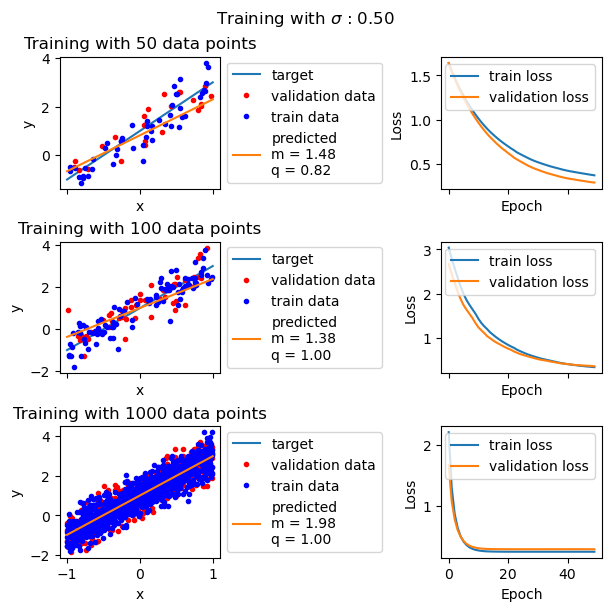

In [112]:
plot_func(sigmas[2])

The rate of convergence increases with the number of points used for training, so with a low amount of points to achieve comparable results more epochs are required.

A low amount of noise doesn't influences significantly the results, but influences the loss function that doesn't converge to zero, but to an higher value that is close to zero. An high amount of noise worsen the fit result and the predicted result.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [136]:
import tensorflow.keras.optimizers as opt
import tensorflow.keras.activations as act
import tensorflow.keras.losses as m_loss
from tensorflow.keras.layers import Dense

losses = [m_loss.MeanSquaredError, m_loss.MeanAbsoluteError, m_loss.MeanAbsolutePercentageError]

def create_complex_func_model(activation):
    model = tf.keras.Sequential()
    model.add(Input(shape=(1,)))
    model.add(Dense(50, activation=activation))
    model.add(Dense(25, activation=activation))
    model.add(Dense(10, activation=activation))
    model.add(Dense(1, activation=activation))
    return model

def f(x):
    return 4 - 3 * x - 2 * x**2 + 3 * x**3

gen_glob_seed = 1

def plot_complex_func_loss(loss):
    global gen_glob_seed

    rng = np.random.default_rng(seed=1)

    x_train = np.random.uniform(-1, 1, 500)
    x_train.sort()
    x_valid = np.random.uniform(-1, 1, 50)

    noise = 0.1
    y_train = f(x_train) + rng.uniform(0, noise)
    y_valid = f(x_valid) + rng.uniform(0, noise)

    activations = [act.relu, act.tanh, act.sigmoid]
    optimizers = [opt.SGD, opt.Adam, opt.RMSprop]
    fig, axs = plt.subplots(3, 3, figsize=(15, 15), layout="constrained", sharex =True, sharey='row')
    for i, activation in enumerate(activations):
        for j, optimizer in enumerate(optimizers):
            # Set deterministic Random Seed to have deterministic results
            tf.random.set_seed(gen_glob_seed)
            model = create_complex_func_model(activation)
            model.compile(optimizer=optimizer(), loss=loss(), metrics=["mse"])
            history = model.fit(
                x_train,
                y_train,
                batch_size=32,
                epochs=30,
                shuffle=True,
                validation_data=(x_valid, y_valid),
            )
            gen_glob_seed += 1
            axs[i, j].plot(history.history["loss"], label="train loss")
            axs[i, j].plot(history.history["val_loss"], label="validation loss")
            axs[i, j].set_ylabel("Loss")
            axs[i, j].set_xlabel("Epoch")
            axs[i, j].legend()
            axs[i, j].set_title(
                f"Activation: {activation.__name__}\nOptimizer: {optimizer.__name__}"
            )
            fig.suptitle(f"Loss: {loss.__name__}")

Epoch 1/30
16/16 [==============================] - 0s 8ms/step - loss: 4.8112 - mse: 4.8112 - val_loss: 0.8148 - val_mse: 0.8148
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6550 - mse: 0.6550 - val_loss: 0.4920 - val_mse: 0.4920
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4982 - mse: 0.4982 - val_loss: 0.4048 - val_mse: 0.4048
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4292 - mse: 0.4292 - val_loss: 0.3735 - val_mse: 0.3735
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.3741 - mse: 0.3741 - val_loss: 0.3112 - val_mse: 0.3112
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.3391 - mse: 0.3391 - val_loss: 0.2823 - val_mse: 0.2823
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.3008 - mse: 0.3008 - val_loss: 0.2511 - val_mse: 0.2511
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2679 - mse: 0.26

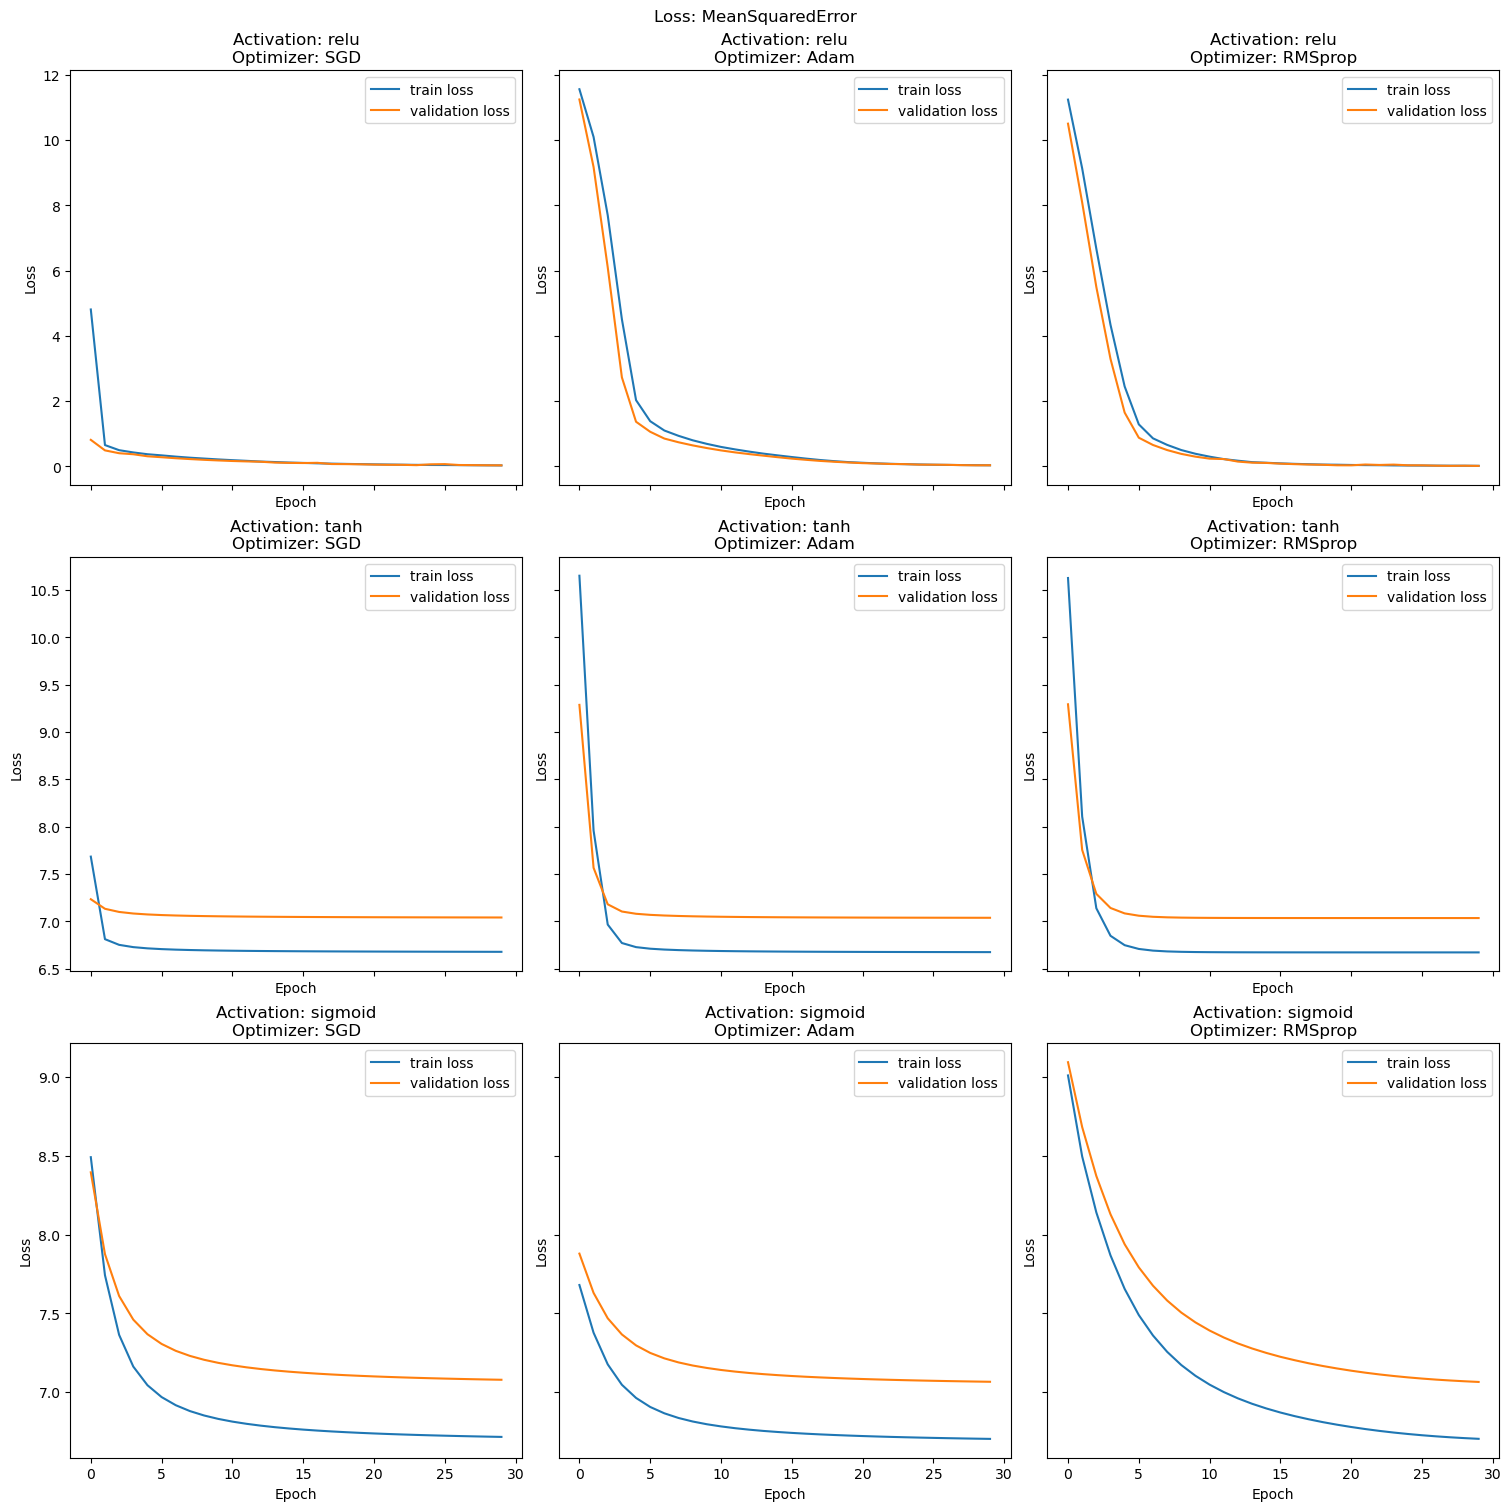

In [138]:
gen_glob_seed = 2
plot_complex_func_loss(losses[0])


Epoch 1/30
16/16 [==============================] - 0s 8ms/step - loss: 3.1433 - mse: 10.9546 - val_loss: 3.2030 - val_mse: 11.3933
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 2.7551 - mse: 8.6854 - val_loss: 2.7674 - val_mse: 8.8260
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 2.2343 - mse: 6.1532 - val_loss: 2.1347 - val_mse: 5.7905
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 1.5212 - mse: 3.4026 - val_loss: 1.4899 - val_mse: 3.1339
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 1.1037 - mse: 1.8362 - val_loss: 1.1178 - val_mse: 1.7299
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.8780 - mse: 1.0541 - val_loss: 0.8890 - val_mse: 1.0190
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7340 - mse: 0.7197 - val_loss: 0.7245 - val_mse: 0.7037
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6182 - mse: 0.

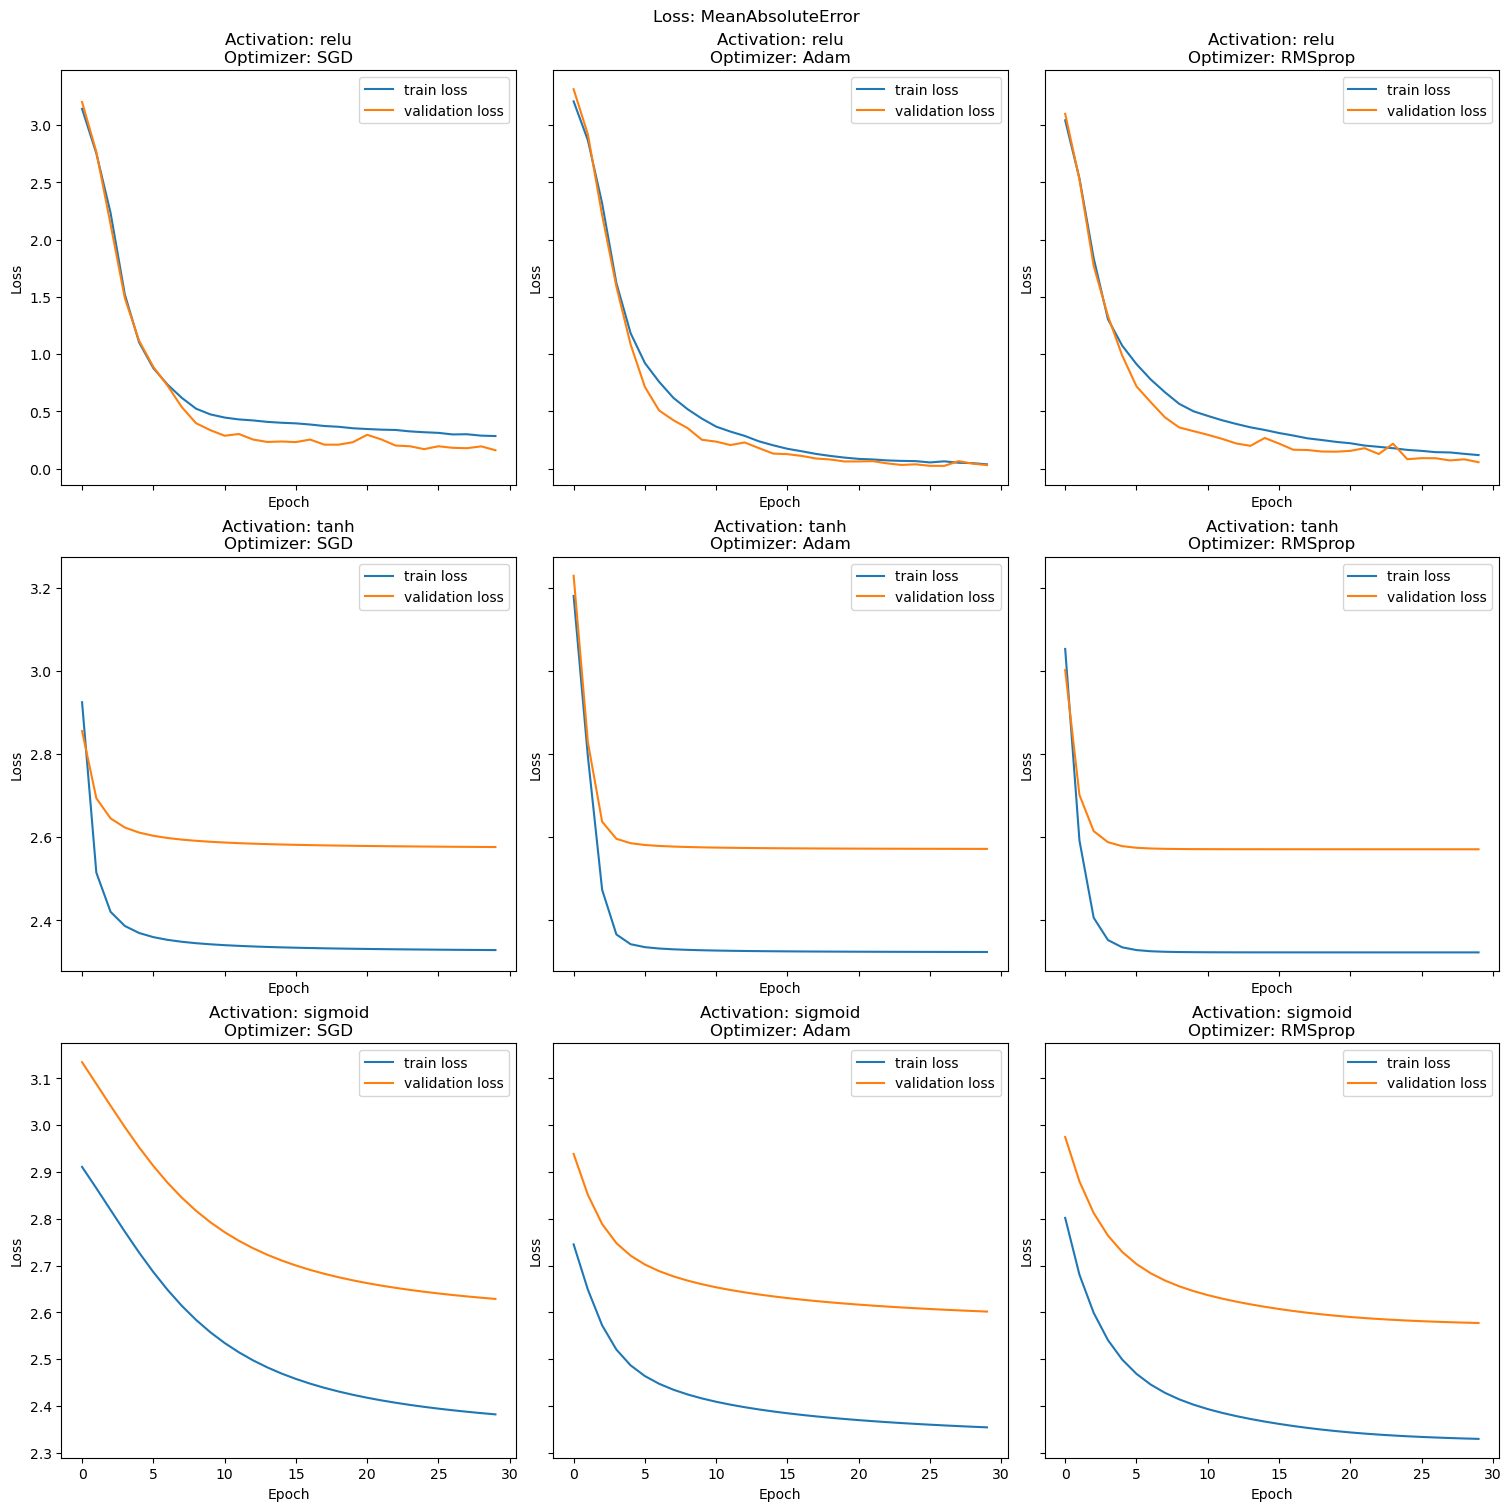

In [142]:
gen_glob_seed = 10
plot_complex_func_loss(losses[1])


Epoch 1/30
16/16 [==============================] - 0s 8ms/step - loss: 39.7660 - mse: 3.3475 - val_loss: 16.8957 - val_mse: 0.3792
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 23.0556 - mse: 0.9741 - val_loss: 15.6637 - val_mse: 0.4281
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 17.3229 - mse: 0.6037 - val_loss: 9.2754 - val_mse: 0.1443
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 13.5376 - mse: 0.3736 - val_loss: 11.7780 - val_mse: 0.3059
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 15.6450 - mse: 0.4881 - val_loss: 6.9689 - val_mse: 0.0796
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 13.5404 - mse: 0.3930 - val_loss: 8.8130 - val_mse: 0.1163
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 13.6715 - mse: 0.4307 - val_loss: 4.7243 - val_mse: 0.0439
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 13.4435 

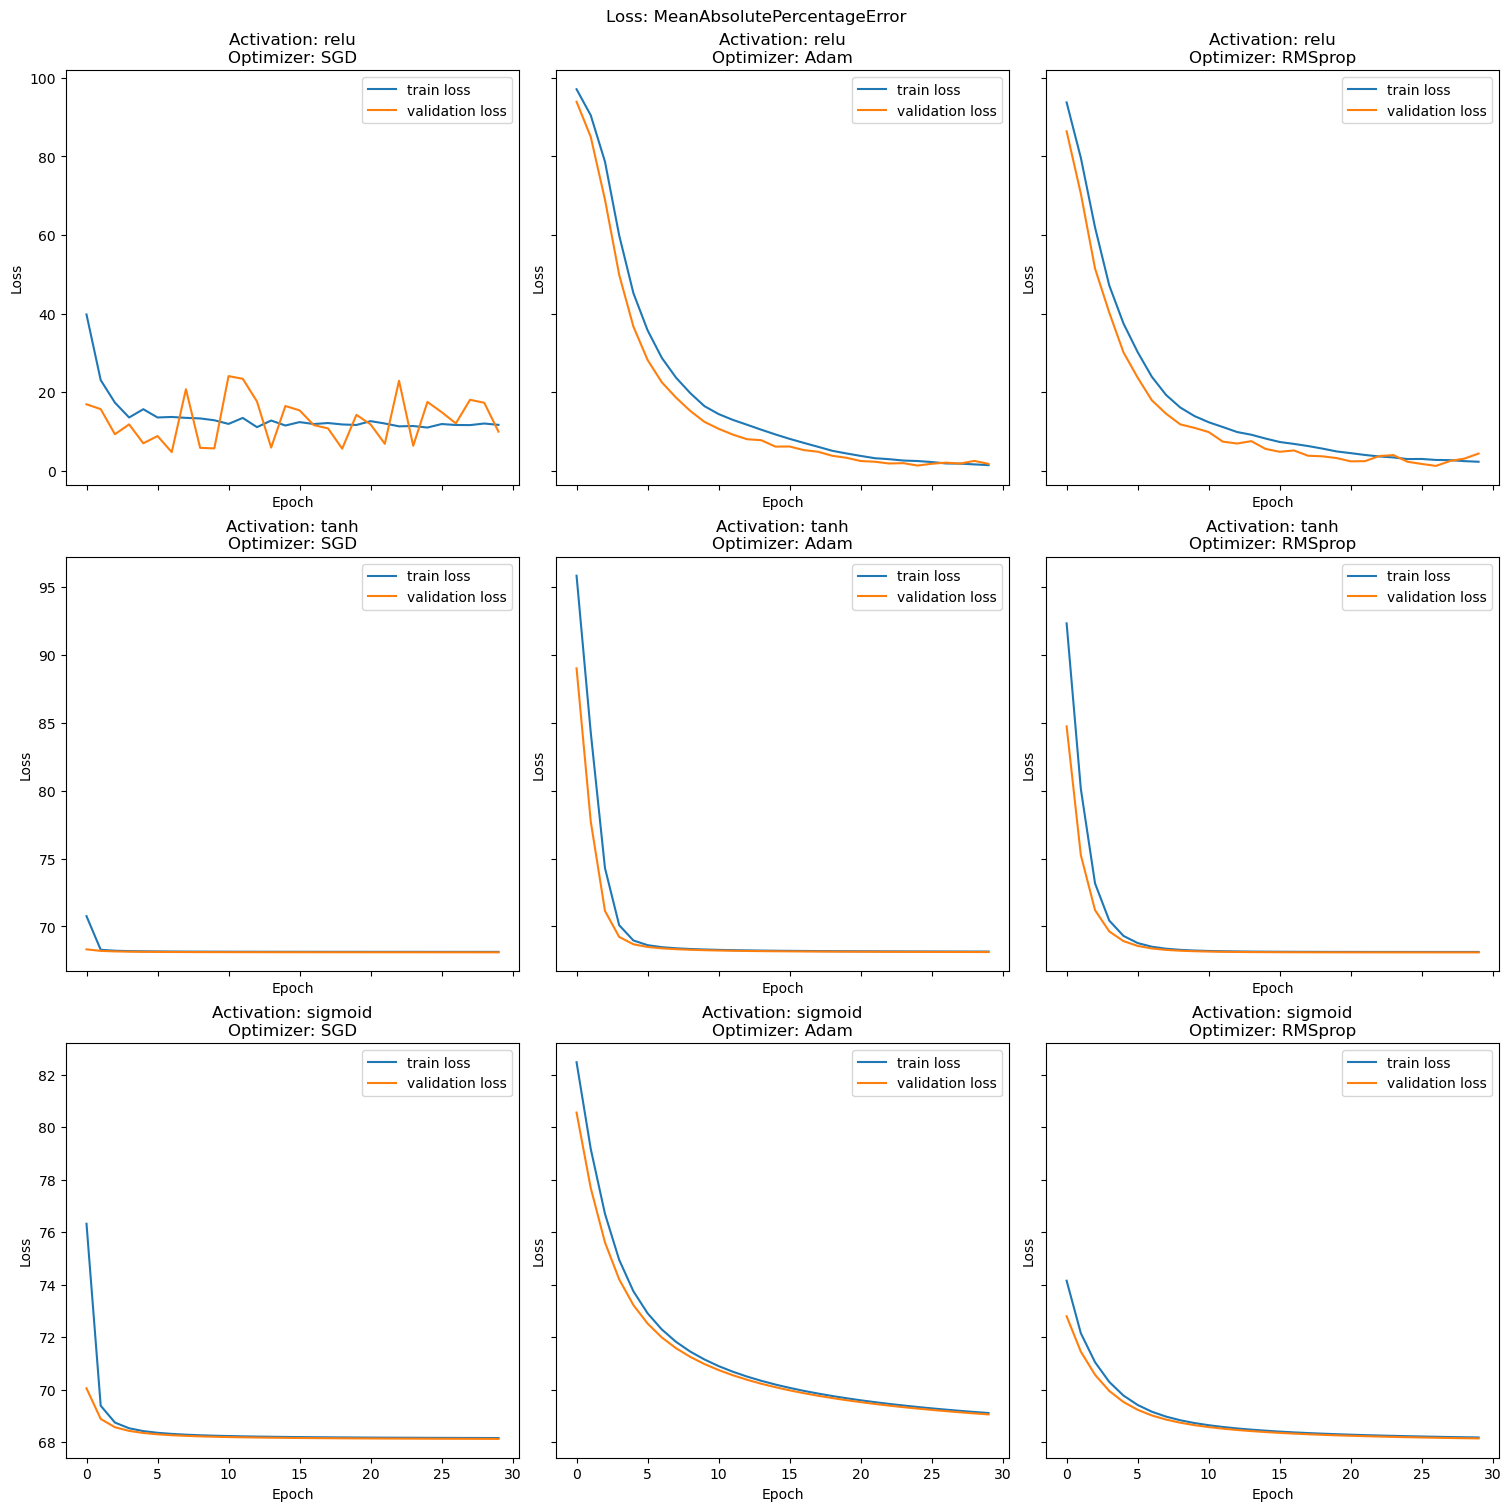

In [143]:
plot_complex_func_loss(losses[2])

Due to some problem during plotting in which some optimizer could not produce their best evaluation and to increase reproducibility the seed of the random number generator was fixed to a value that deterministically produces the best results across all the graphs.

From the above graphs it seems that the biggest difference is achieved by changing the activation function. In particular best results are obtained using as activation function ReLU.

The various metrics used to analyze the problem do not differ in the final results, but they change how we get to these results, in fact using MeanSquareError we have a smooother curve that converges rapidly, whilst the other two metrics have a slower convergence and produce a rougher curve.

Observing instead the optimizer we can see that for this problem Adam seems to be the best in term of convergence rate and resulting loss, followed by RMSprop and then SGD. This could be predicted because both RMSprop and Adam are evolutions of SGD.

Epoch 1/30
16/16 [==============================] - 1s 7ms/step - loss: 11.9627 - mse: 11.9627 - val_loss: 10.8375 - val_mse: 10.8375
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 10.2279 - mse: 10.2279 - val_loss: 8.8158 - val_mse: 8.8158
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 7.6343 - mse: 7.6343 - val_loss: 5.9968 - val_mse: 5.9968
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 4.5787 - mse: 4.5787 - val_loss: 3.1519 - val_mse: 3.1519
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 2.0364 - mse: 2.0364 - val_loss: 1.7578 - val_mse: 1.7578
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 1.3699 - mse: 1.3699 - val_loss: 1.4412 - val_mse: 1.4412
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 1.0949 - mse: 1.0949 - val_loss: 1.1842 - val_mse: 1.1842
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.9171 - mse

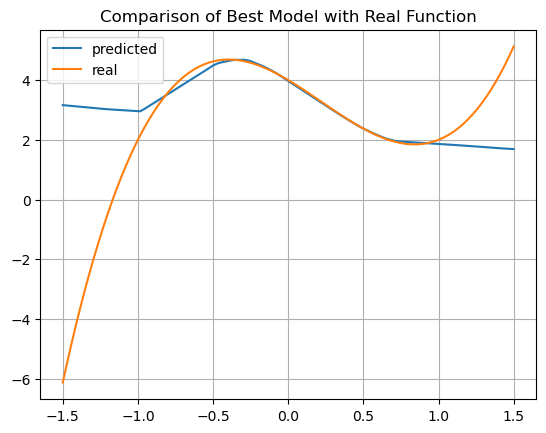

In [145]:
rng = np.random.default_rng(seed=1)

x_train = np.random.uniform(-1, 1, 500)
x_train.sort()
x_valid = np.random.uniform(-1, 1, 50)


y_train = f(x_train)
y_valid = f(x_valid)



model = create_complex_func_model(act.relu)
model.compile(metrics=["mse"], loss=m_loss.MeanSquaredError(), optimizer=opt.Adam())
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    shuffle=True,
    validation_data=(x_valid, y_valid),
)


x_plot= np.linspace( -1.5, 1.5, 100)
y_plot = model.predict(x_plot)
y_real= f(x_plot)

plt.plot(x_plot, y_plot, label="predicted")
plt.plot(x_plot, y_real, label="real")
plt.legend()
plt.title("Comparison of Best Model with Real Function")
plt.grid()

We can see that in the interval where points were sampled the neural network is capable to fit accurately the curve, while in the region outside of this range we observe a loss in accuracy.
This is due to the neural network not having information about the function outside of $[-1,1]$.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

In [118]:
def h(x, y):
    return np.sin(x**2 + y**2)


noise = 0.1

x_train = np.random.uniform(-1.5, 1.5, 500)
y_train = np.random.uniform(-1.5, 1.5, 500)

x_valid = np.random.uniform(-1.5, 1.5, 50)
y_valid = np.random.uniform(-1.5, 1.5, 50)

x_valid.sort()
y_valid.sort()

# Creating Meshgrids
X_train, Y_train = np.meshgrid(x_train, y_train)
X_valid, Y_valid = np.meshgrid(x_valid, y_valid)

Z_train = np.random.normal(h(X_train, Y_train), noise)

Z_valid = h(X_valid, Y_valid)

In [119]:
vec_train = np.array([X_train.flatten(), Y_train.flatten()]).T

In [120]:
input_layer = keras.Input(shape=(2,))
x = keras.layers.Dense(64, activation="relu", name="layer1")(input_layer)
x = keras.layers.Dense(64, activation="relu", name="layer2")(x)
x = keras.layers.Dense(32, activation="relu", name="layer3")(x)
x = keras.layers.Dense(16, activation="relu", name="layer4")(x)
x = keras.layers.Dense(8, activation="relu", name="layer5")(x)
output = keras.layers.Dense(1, activation="linear", name="output")(x)

model = keras.Model(
    inputs=input_layer,
    outputs=output,
    name="Modello",
)


model.summary()

Model: "Modello"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_235 (InputLayer)      [(None, 2)]               0         
                                                                 
 layer1 (Dense)              (None, 64)                192       
                                                                 
 layer2 (Dense)              (None, 64)                4160      
                                                                 
 layer3 (Dense)              (None, 32)                2080      
                                                                 
 layer4 (Dense)              (None, 16)                528       
                                                                 
 layer5 (Dense)              (None, 8)                 136       
                                                                 
 output (Dense)              (None, 1)                 9   

In [121]:
model.compile(optimizer=keras.optimizers.Adam(), loss="mse", metrics=["mse"])

Epoch 1/10
7813/7813 [==============================] - 6s 739us/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 2/10
7813/7813 [==============================] - 6s 707us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3/10
7813/7813 [==============================] - 5s 686us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 4/10
7813/7813 [==============================] - 5s 676us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 5/10
7813/7813 [==============================] - 5s 653us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 6.7315e-04 - val_mse: 6.7315e-04
Epoch 6/10
7813/7813 [==============================] - 5s 698us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 7/10
7813/7813 [==============================] - 5s 677us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 2.4389e-04 - val_mse: 2.4389e-04
Epoch 8/10
7813/7813 [==========

Text(0.5, 1.0, 'Model Loss')

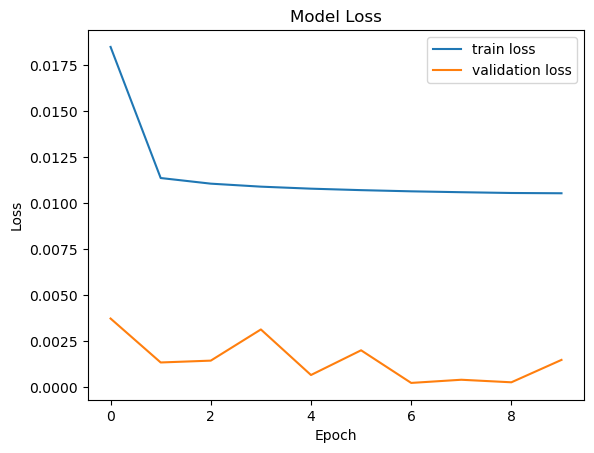

In [122]:
history = model.fit(
    x=vec_train,
    y=Z_train.flatten(),
    epochs=10,
    batch_size=32,
    shuffle=True,
    validation_data=(
        np.array([X_valid.flatten(), Y_valid.flatten()]).T,
        Z_valid.flatten(),
    ),
)

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")


79/79 [==============================] - 0s 482us/step
[[-1.0167764  -0.9027345  -0.8561555  ... -0.6593559  -0.7269468
  -0.8408567 ]
 [-0.8102578  -0.69520557 -0.6472391  ... -0.3947091  -0.486723
  -0.62060636]
 [-0.74689317 -0.6265821  -0.56615937 ... -0.2954409  -0.392756
  -0.53792083]
 ...
 [-0.7184672  -0.6051378  -0.54712516 ... -0.4053412  -0.50161624
  -0.62911403]
 [-0.8503505  -0.7370941  -0.69081044 ... -0.58794236 -0.6591597
  -0.76865935]
 [-0.8650924  -0.7523287  -0.7060451  ... -0.60478365 -0.6760009
  -0.7840084 ]]


/tmp/ipykernel_2481362/4228586989.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_valid, Y_valid, Z_predict, cmap=cm.Blues, label='predicted values')


Text(0.5, 0.98, 'Predicted values vs Target values')

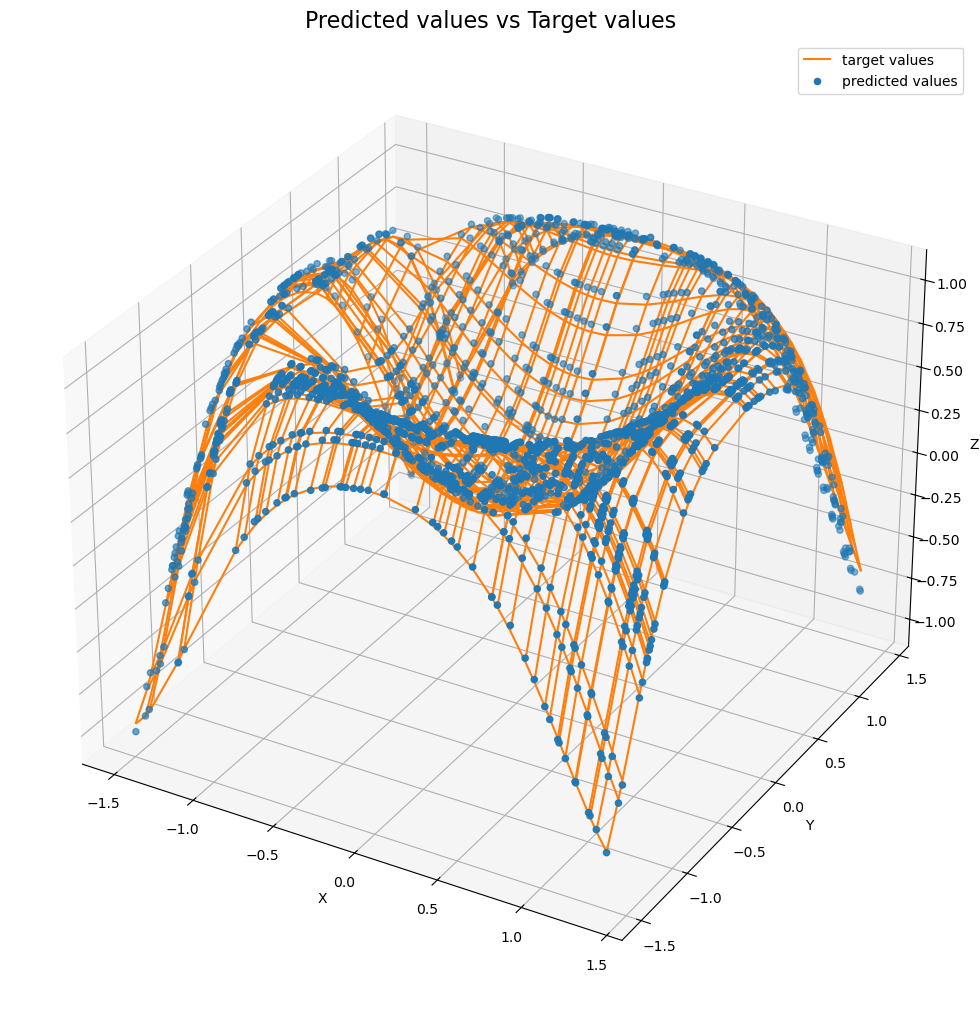

In [123]:
from matplotlib import cm

z_predict = model.predict(np.array([X_valid.flatten(), Y_valid.flatten()]).T)

Z_predict = z_predict.reshape(Z_valid.shape)

print(Z_predict)

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"), figsize=(10, 10), layout = 'constrained')

ax.plot_wireframe(X_valid, Y_valid, Z_valid, color="C1", label="target values")
ax.scatter(X_valid, Y_valid, Z_predict, cmap=cm.Blues, label='predicted values')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
# ax.set_title("Predicted values")
ax.legend()
fig.suptitle("Predicted values vs Target values", fontsize=16)

# ax.scatter(X_train, Y_train, Z_train)

Trying this exercise I noted that the network capabilities to fit the function depend heavily on the number of layers, more than the number of neurons in each layer. So a Neural Network with more layers is capable to produce a better fit, than a monolayer with the same number of neurons. This is due to the fact that by increasing the number of layers we achieve a greater number of interconnections in the topology of the neural network, that are proportional to the number of parameters.
This in contrast increases training time so depending on the hardware it may not feasable to increase the number of layers due to time and electrical consumption constraints.
